<a href="https://colab.research.google.com/github/vitorlooo/AnaliseDados_projeto1/blob/main/AnaliseProjetoMusicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto Análise de Dados**


# **Base 05 - Músicas Mais Tocadas**

**Descrição geral:**
Base com dados sobre as músicas mais populares em 2024, abrangendo plataformas como Spotify, YouTube, TikTok, entre outras.

**Desafios de análise:**
- Identificar padrões musicais que impulsionam popularidade.
- Avaliar impacto de diferentes mídias sociais na divulgação de músicas.
- Analisar métricas de engajamento ao longo do tempo.

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy import stats

In [10]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/05musicas.csv", sep=',', encoding='latin1')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **1. Análise Inicial da Base: Músicas Mais Tocadas**


# 1.1 Descrição:

**Tema:**
A base trata das músicas mais populares em 2024, reunindo dados de desempenho e engajamento em diversas plataformas de streaming e redes sociais, como Spotify, YouTube, TikTok, Apple Music, Deezer, entre outras.


**Número de Registros:**

A base contém 4.600 músicas, cada uma representando um único registro (linha).


**Número de Variáveis:**

A base possui 29 variáveis, que abrangem:

- Informações gerais sobre a música (nome, artista, data de lançamento, código ISRC, classificação histórica).

- Métricas de popularidade e engajamento em plataformas digitais (streams, curtidas, visualizações, presença em playlists, etc.).

- Indicadores de performance em rádios, reconhecimento por aplicativos como Shazam e SoundCloud.**negrito**

- Informações sobre se a faixa possui conteúdo explícito.



**Contexto Empresarial:**

Esta base pode ser extremamente útil para gravadoras, plataformas de streaming, agências de marketing musical e artistas, pois permite:

- Identificar padrões que impulsionam o sucesso de uma faixa.

- Avaliar o impacto das redes sociais na popularidade das músicas.

- Apoiar decisões estratégicas de divulgação e investimento com base em dados reais de engajamento.

### Dicionário de Variáveis

| Variável                     | Descrição                                               |
|-----------------------------|----------------------------------------------------------|
| Track                       | Nome da música                                           |
| Album Name                  | Nome do álbum                                            |
| Artist                      | Nome do artista                                          |
| Release Date                | Data de lançamento                                       |
| ISRC                        | Código internacional da faixa                           |
| All Time Rank               | Posição da música no ranking histórico                   |
| Track Score                 | Nota da faixa (score)                                    |
| Spotify Streams             | Número de execuções no Spotify                          |
| Spotify Playlist Count      | Quantidade de playlists do Spotify                      |
| Spotify Playlist Reach      | Alcance das playlists do Spotify                        |
| Spotify Popularity          | Popularidade da música no Spotify                       |
| YouTube Views               | Visualizações no YouTube                                |
| YouTube Likes               | Curtidas no YouTube                                     |
| TikTok Posts                | Número de posts no TikTok                               |
| TikTok Likes                | Curtidas no TikTok                                      |
| TikTok Views                | Visualizações no TikTok                                 |
| YouTube Playlist Reach      | Alcance das playlists no YouTube                        |
| Apple Music Playlist Count  | Quantidade de playlists na Apple Music                  |
| AirPlay Spins               | Execuções em rádios AirPlay                             |
| SiriusXM Spins              | Execuções na SiriusXM                                   |
| Deezer Playlist Count       | Quantidade de playlists no Deezer                       |
| Deezer Playlist Reach       | Alcance das playlists no Deezer                         |
| Amazon Playlist Count       | Quantidade de playlists na Amazon Music                 |
| Pandora Streams             | Execuções na Pandora                                    |
| Pandora Track Stations      | Número de estações da Pandora com a faixa               |
| Soundcloud Streams          | Execuções no SoundCloud                                 |
| Shazam Counts               | Quantidade de identificações via Shazam                 |
| TIDAL Popularity            | Popularidade no TIDAL                                   |
| Explicit Track              | Contém conteúdo explícito (Sim/Não)                     |


In [92]:
df.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1,725.4,390470936,30716,196631588,...,40975,684,62.0,17598718,114.0,18004655,22931,4818457,2669262,0
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,USUG12400910,2,545.9,323703884,28113,174597137,...,40778,3,67.0,10422430,111.0,7780028,28444,6623075,1118279,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,QZJ842400387,3,538.4,601309283,54331,211607669,...,74333,536,136.0,36321847,172.0,5022621,5639,7208651,5285340,0
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,USSM12209777,4,444.9,2031280633,269802,136569078,...,1474799,2182,264.0,24684248,210.0,190260277,203384,0,11822942,0
4,Houdini,Houdini,Eminem,2024-05-31,USUG12403398,5,423.3,107034922,7223,151469874,...,12185,1,82.0,17660624,105.0,4493884,7006,207179,457017,1


In [15]:
df.describe()

,Track Score,Spotify Popularity,Apple Music Playlist Count,Deezer Playlist Count,Amazon Playlist Count,TIDAL Popularity,Explicit Track
count,4600.000000,3796.000000,4039.00000,3679.000000,3545.000000,0.0,4600.000000
mean,41.844043,63.501581,54.60312,32.310954,25.348942,NaN,0.358913
std,38.543766,16.186438,71.61227,54.274538,25.989826,NaN,0.479734
min,19.400000,1.000000,1.00000,1.000000,1.000000,NaN,0.000000
25%,23.300000,61.000000,10.00000,5.000000,8.000000,NaN,0.000000
50%,29.900000,67.000000,28.00000,15.000000,17.000000,NaN,0.000000
75%,44.425000,73.000000,70.00000,37.000000,34.000000,NaN,1.000000
max,725.400000,96.000000,859.00000,632.000000,210.000000,NaN,1.000000


# 1.2 Apresente uma tabela com a quantidade de dados nulos em cada variável

In [93]:
tabela_nulos = df.isnull().sum().reset_index()
tabela_nulos.columns = ['Variável', 'Qtd_Nulos']

# Exibir a tabela ordenada pela quantidade de nulos (opcional)
tabela_nulos = tabela_nulos.sort_values(by='Qtd_Nulos', ascending=False)

# Mostrar a tabela
print(tabela_nulos)

                      Variável  Qtd_Nulos
0                        Track          0
1                   Album Name          0
2                       Artist          0
3                 Release Date          0
4                         ISRC          0
5                All Time Rank          0
6                  Track Score          0
7              Spotify Streams          0
8       Spotify Playlist Count          0
9       Spotify Playlist Reach          0
10          Spotify Popularity          0
11               YouTube Views          0
12               YouTube Likes          0
13                TikTok Posts          0
14                TikTok Likes          0
15                TikTok Views          0
16      YouTube Playlist Reach          0
17  Apple Music Playlist Count          0
18               AirPlay Spins          0
19              SiriusXM Spins          0
20       Deezer Playlist Count          0
21       Deezer Playlist Reach          0
22       Amazon Playlist Count    

# 1.3 Limpeza dos dados


In [18]:
# Remoção de uma coluna 100% nulas, sem informações útils
df.drop(columns=['TIDAL Popularity'], inplace = True)

In [19]:
# Preecher a coluna "Artist" faltantes com "Desconhecido"

df['Artist'] = df['Artist'].fillna('Desconhecido')


In [16]:
df = df.fillna(0)

In [73]:
df['Release Date'] = pd.to_datetime(df['Release Date'], errors='coerce')

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Track                       4600 non-null   object        
 1   Album Name                  4600 non-null   object        
 2   Artist                      4600 non-null   object        
 3   Release Date                4600 non-null   datetime64[ns]
 4   ISRC                        4600 non-null   object        
 5   All Time Rank               4600 non-null   int64         
 6   Track Score                 4600 non-null   float64       
 7   Spotify Streams             4600 non-null   int64         
 8   Spotify Playlist Count      4600 non-null   int64         
 9   Spotify Playlist Reach      4600 non-null   int64         
 10  Spotify Popularity          4600 non-null   float64       
 11  YouTube Views               4600 non-null   int64       

In [75]:
linhas_antes_duplicatas = df.shape[0]
df.drop_duplicates(inplace=True)
linhas_depois_duplicatas = df.shape[0]
if linhas_depois_duplicatas < linhas_antes_duplicatas:
    print(f"{linhas_antes_duplicatas - linhas_depois_duplicatas} linhas duplicadas foram removidas.")
else:
    print("Nenhuma linha duplicada foi encontrada ou removida.")

2 linhas duplicadas foram removidas.


In [21]:
# Lista de colunas que precisam ser convertidas para numérico
cols_to_convert_to_numeric = [
    'All Time Rank',
    'Spotify Streams',
    'Spotify Playlist Count',
    'Spotify Playlist Reach',
    'YouTube Views',
    'YouTube Likes',
    'TikTok Posts',
    'TikTok Likes',
    'TikTok Views',
    'YouTube Playlist Reach',
    'SiriusXM Spins',
    'AirPlay Spins',
    'Deezer Playlist Reach',
    'Amazon Playlist Count',
    'Pandora Streams',
    'Pandora Track Stations',
    'Shazam Counts',
    'Soundcloud Streams'
]
print(df.columns)

for col in cols_to_convert_to_numeric:
    df[col] = df[col].astype(str).str.replace('∅', '', regex=False).str.replace(',', '', regex=False).str.strip()

    df[col] = pd.to_numeric(df[col], errors='coerce')

print(df.info())

Index(['Track', 'Album Name', 'Artist', 'Release Date', 'ISRC',
       'All Time Rank', 'Track Score', 'Spotify Streams',
       'Spotify Playlist Count', 'Spotify Playlist Reach',
       'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts',
       'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
       'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins',
       'Deezer Playlist Count', 'Deezer Playlist Reach',
       'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations',
       'Soundcloud Streams', 'Shazam Counts', 'Explicit Track'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4600 non-null 

In [83]:
# Exemplo para identificar outliers
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    print(f'{col}: {len(outliers)} outliers')


All Time Rank: 0 outliers
Track Score: 402 outliers
Spotify Streams: 305 outliers
Spotify Playlist Count: 239 outliers
Spotify Playlist Reach: 376 outliers
Spotify Popularity: 874 outliers
YouTube Views: 480 outliers
YouTube Likes: 390 outliers
TikTok Posts: 664 outliers
TikTok Likes: 552 outliers
TikTok Views: 571 outliers
YouTube Playlist Reach: 524 outliers
Apple Music Playlist Count: 412 outliers
AirPlay Spins: 722 outliers
SiriusXM Spins: 614 outliers
Deezer Playlist Count: 370 outliers
Deezer Playlist Reach: 639 outliers
Amazon Playlist Count: 242 outliers
Pandora Streams: 693 outliers
Pandora Track Stations: 764 outliers
Soundcloud Streams: 1072 outliers
Shazam Counts: 519 outliers
Explicit Track: 0 outliers


# **2. Análise Estática**

# 2.1 Distribuição das variáveis com histogramas e boxplots:




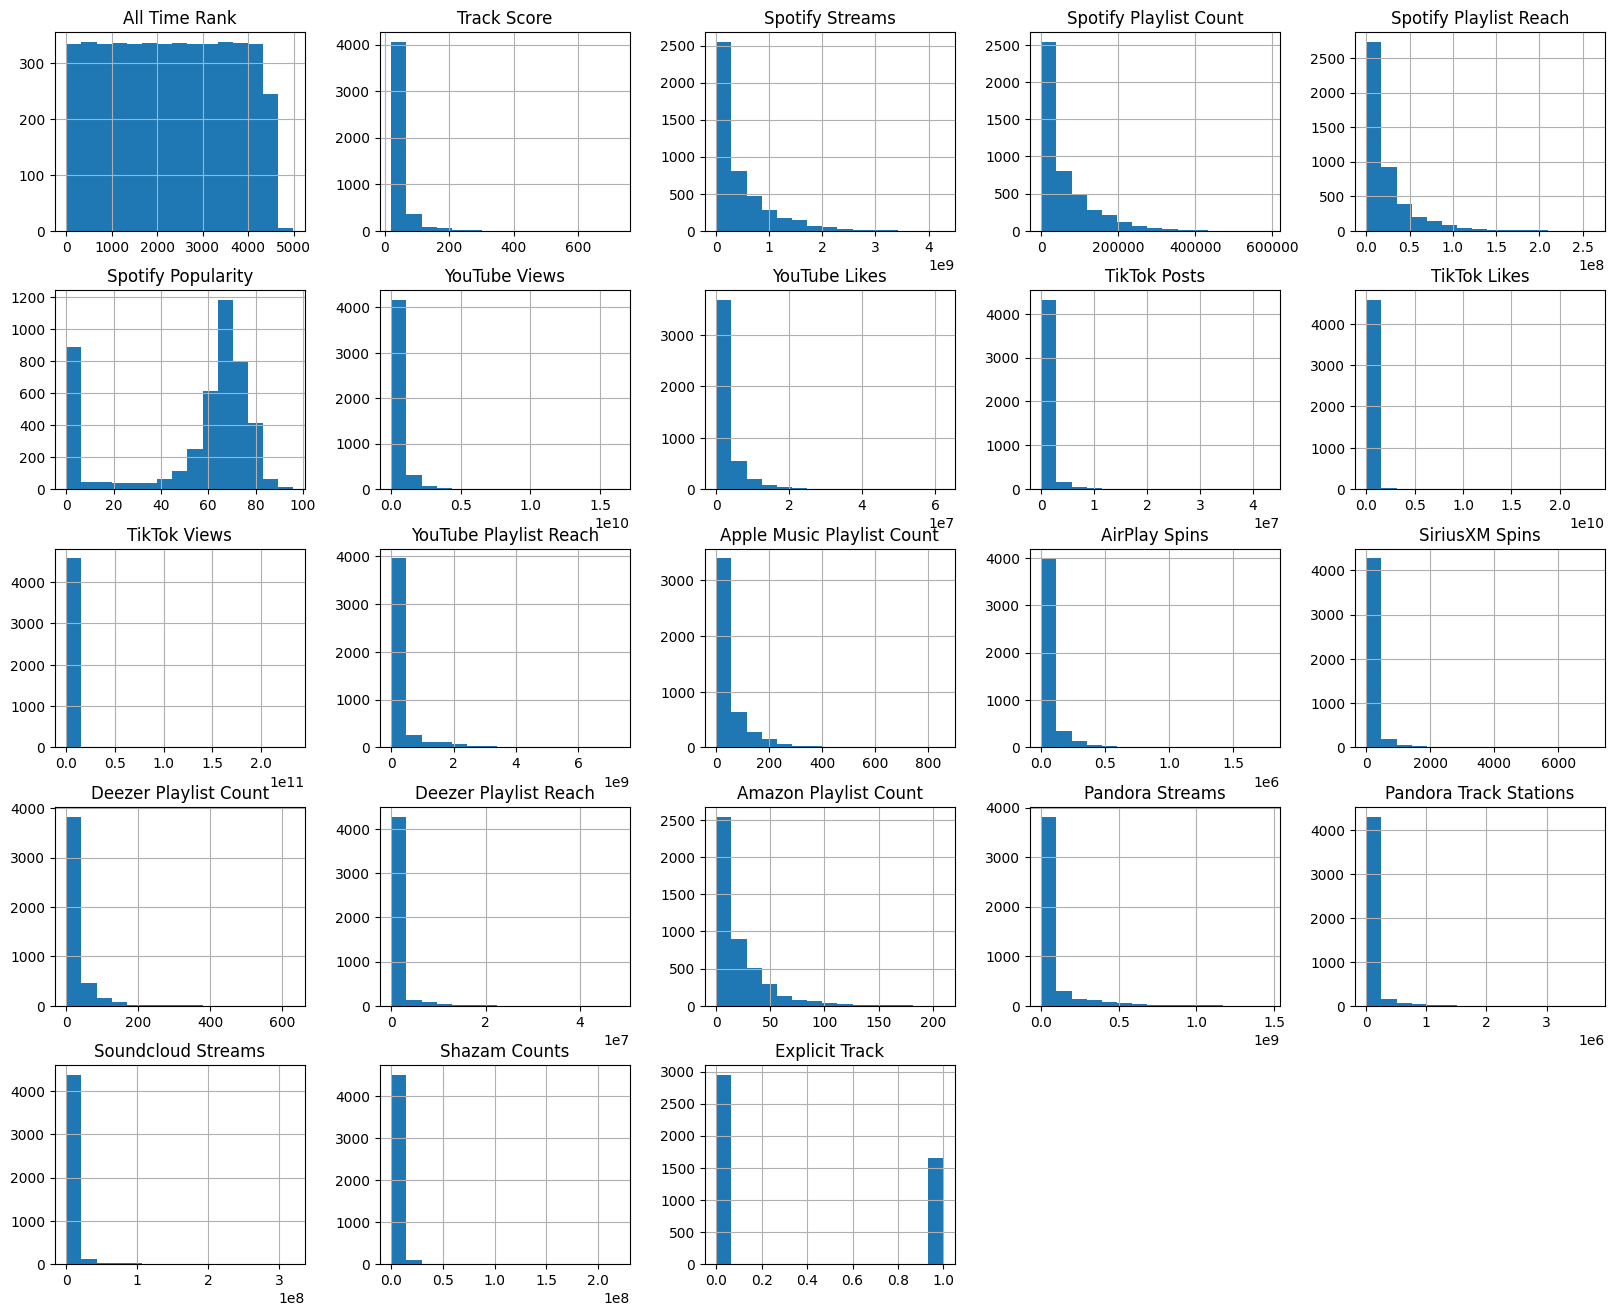

In [23]:
df.hist(bins=15, figsize=(20,16));

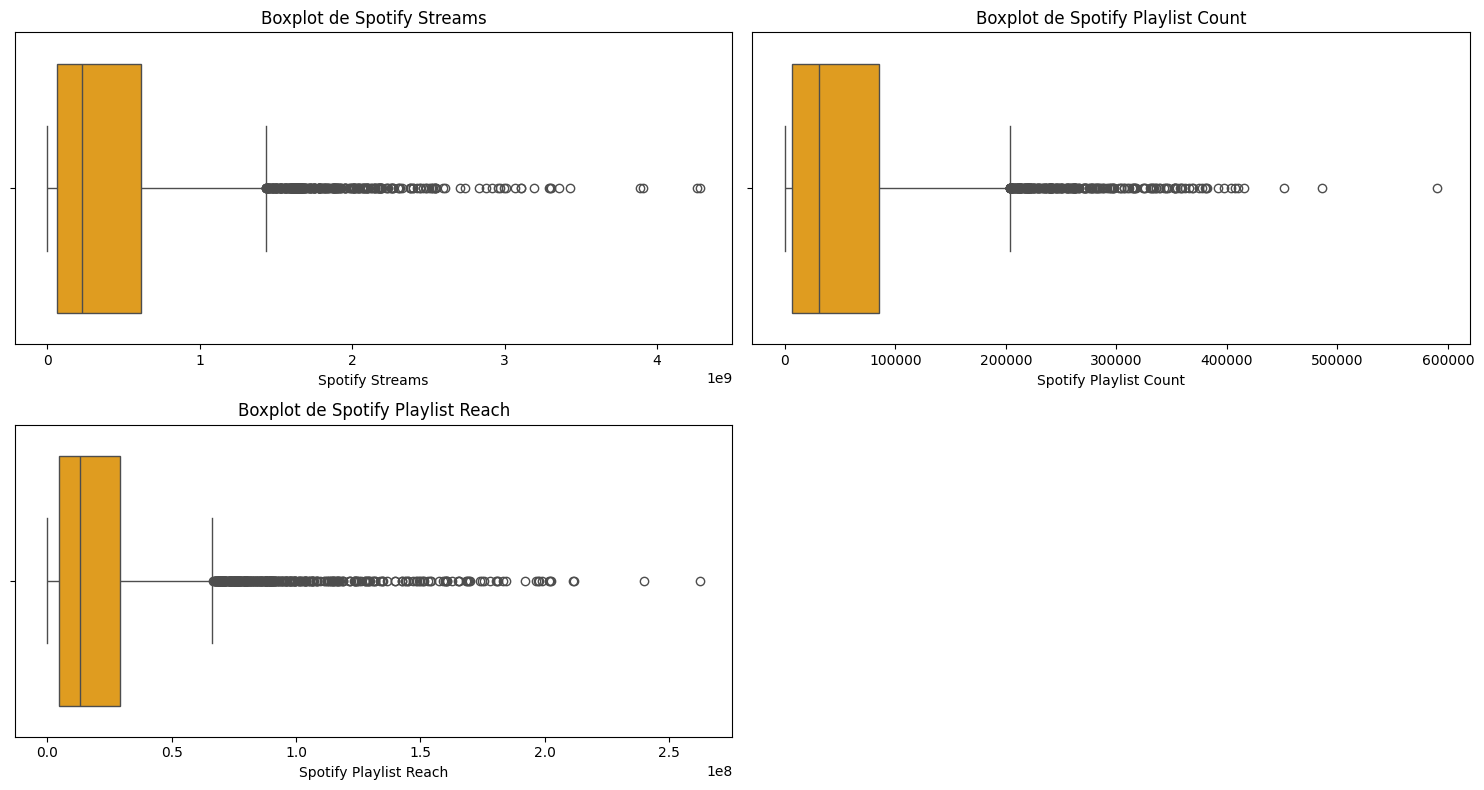

In [80]:
spotify_metrics = ['Spotify Streams', 'Spotify Playlist Count', 'Spotify Playlist Reach']

plt.figure(figsize=(15, 8))
for i, col in enumerate(spotify_metrics):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=df[col], color='orange')
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

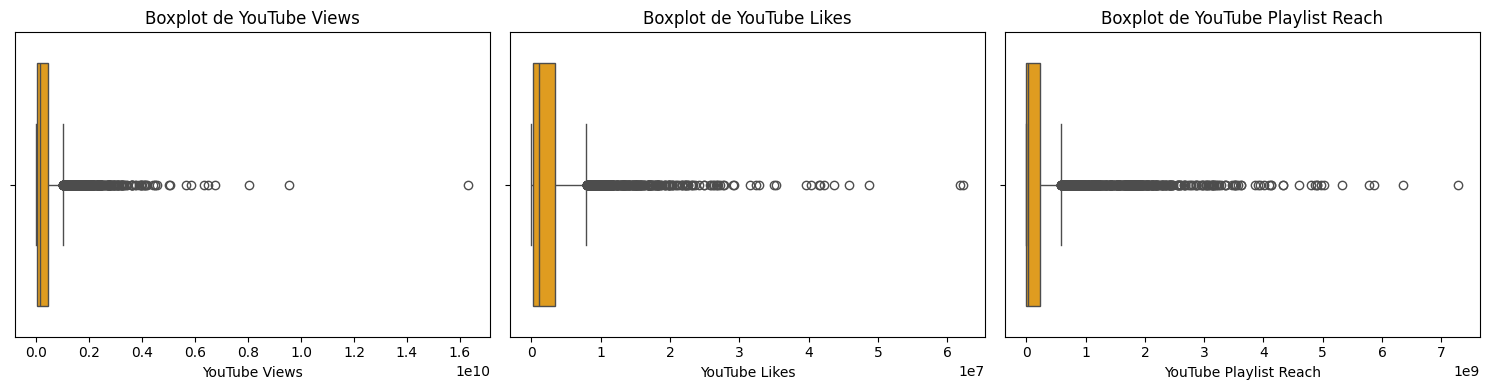

In [78]:
youtube_metrics = ['YouTube Views', 'YouTube Likes', 'YouTube Playlist Reach']

plt.figure(figsize=(15, 4))
for i, col in enumerate(youtube_metrics):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x=df[col], color='orange')
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

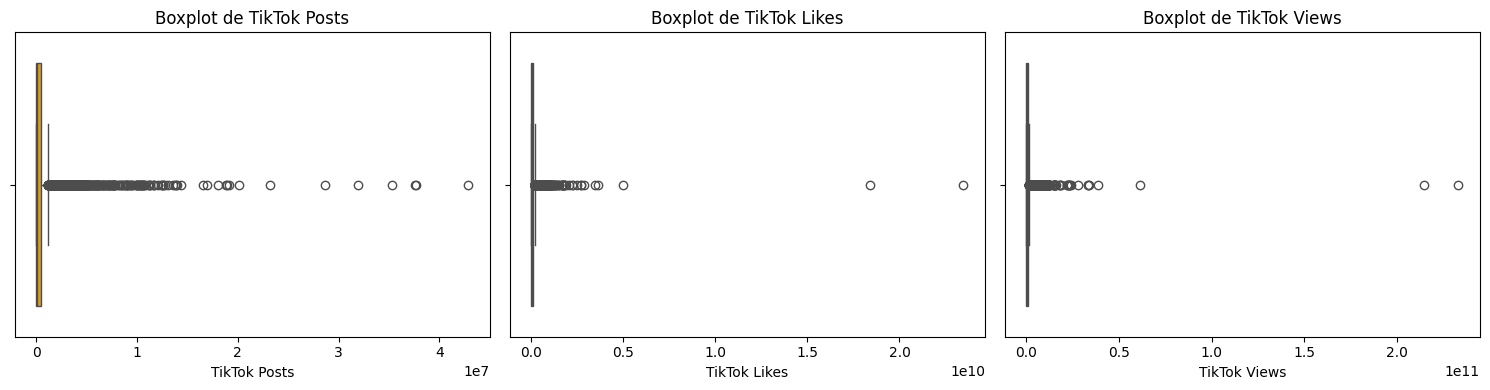

In [79]:
tiktok_metrics = ['TikTok Posts', 'TikTok Likes', 'TikTok Views']

plt.figure(figsize=(15, 4))
for i, col in enumerate(tiktok_metrics):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x=df[col], color='orange')
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

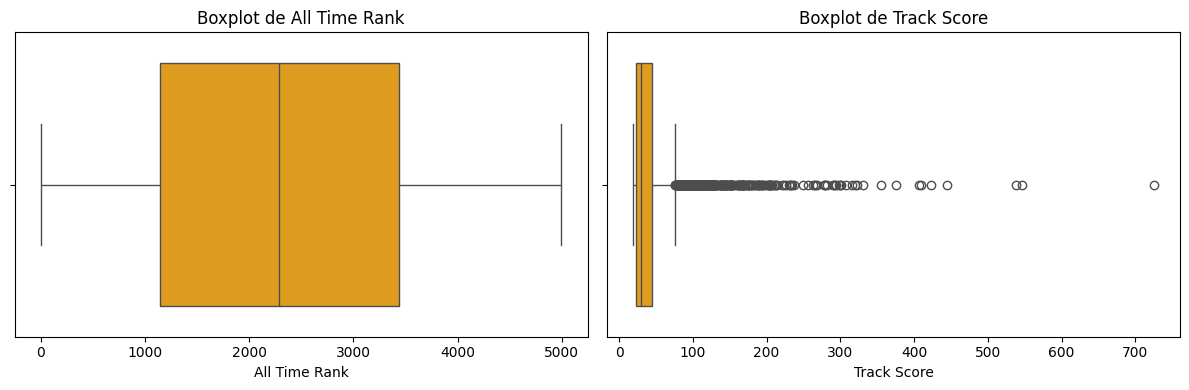

In [82]:
general_metrics = ['All Time Rank', 'Track Score']

plt.figure(figsize=(12, 4))
for i, col in enumerate(general_metrics):
    plt.subplot(1, 2, i + 1)
    sns.boxplot(x=df[col], color='orange')
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

# 2.2 Medidas de tendência central e dispersão:


In [94]:
# Estatísticas descritivas
estatisticas = df[numeric_cols].describe().T

# Adicionar mediana
estatisticas['mediana'] = df[numeric_cols].median()

# Mostrar tabela
print(estatisticas[['count', 'mean', 'std', 'min', '25%', 'mediana', '75%', 'max']])

                             count          mean           std   min  \
All Time Rank               4598.0  2.290399e+03  1.323056e+03   1.0   
Track Score                 4598.0  4.185089e+01  3.855071e+01  19.4   
Spotify Streams             4598.0  4.364114e+08  5.363829e+08   0.0   
Spotify Playlist Count      4598.0  5.849324e+04  7.097553e+04   0.0   
Spotify Playlist Reach      4598.0  2.298610e+07  2.960169e+07   0.0   
Spotify Popularity          4598.0  5.239539e+01  2.825172e+01   0.0   
YouTube Views               4598.0  3.758033e+08  6.855228e+08   0.0   
YouTube Likes               4598.0  2.729885e+06  4.495699e+06   0.0   
TikTok Posts                4598.0  7.037799e+05  2.148009e+06   0.0   
TikTok Likes                4598.0  8.867183e+07  4.900078e+08   0.0   
TikTok Views                4598.0  9.138656e+08  5.239468e+09   0.0   
YouTube Playlist Reach      4598.0  2.685348e+08  6.093766e+08   0.0   
Apple Music Playlist Count  4598.0  4.795020e+01  6.945570e+01  

# 2.3 Matriz de correlação entre variáveis numéricas:






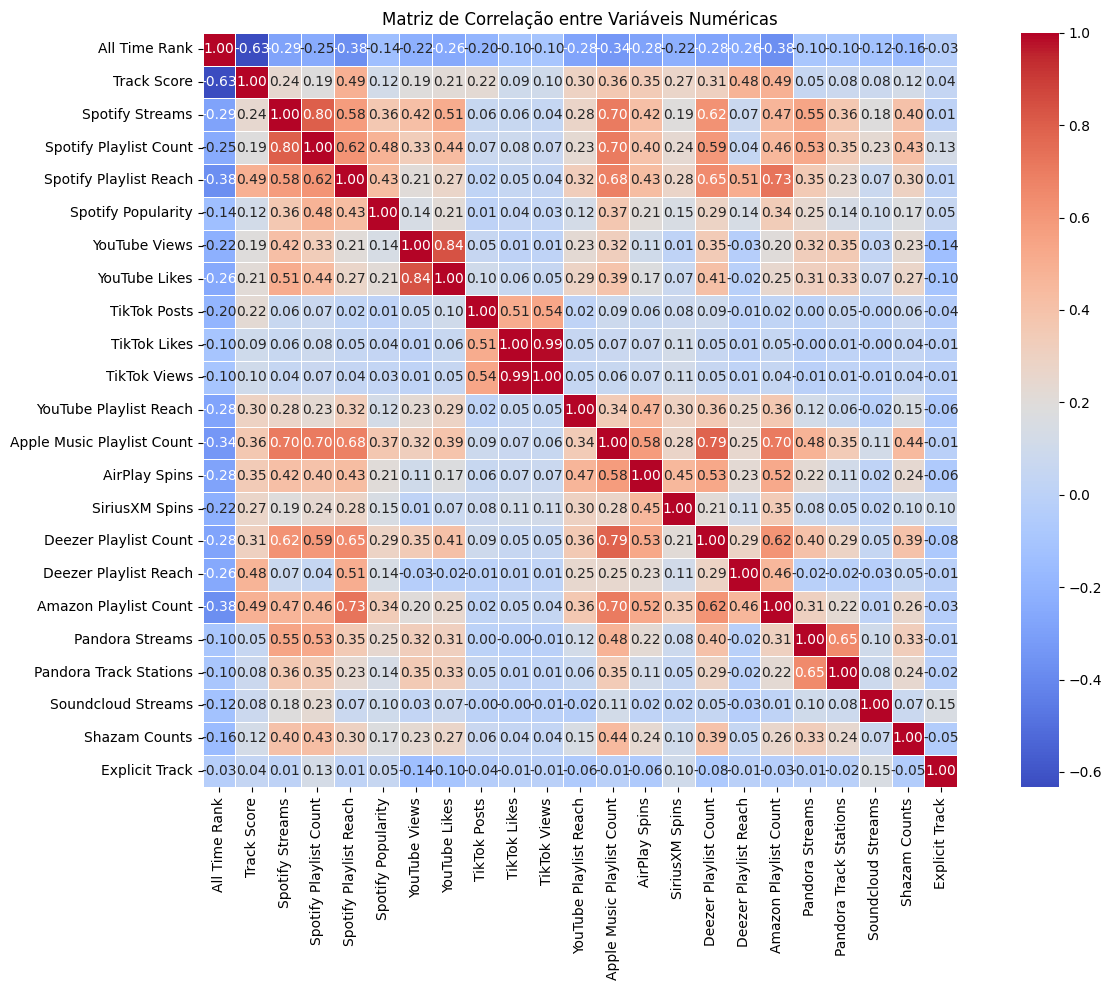

In [39]:

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

correlacoes = df[numeric_cols].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlacoes, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.tight_layout()
plt.show()


# **3. Formulação de Hipóteses**

## 3.1 Hipótese 1: Existe uma correlação positiva significativa entre o número de execuções no Spotify (Spotify Streams) e o número de visualizações no YouTube (YouTube Views)

- Apresente análise estatística completa
- Inclua visualizações adequadas
- Realize teste de significância quando aplicável


Hipótese: Existe uma correlação positiva significativa entre o número de execuções no Spotify (Spotify Streams) e o número de visualizações no YouTube (YouTube Views).

Análise de Correlação:
Coeficiente de Correlação de Pearson: 0.4173
P-valor: 0.0000

Rejeitamos H0: Existe uma correlação positiva significativa entre Spotify Streams e YouTube Views.


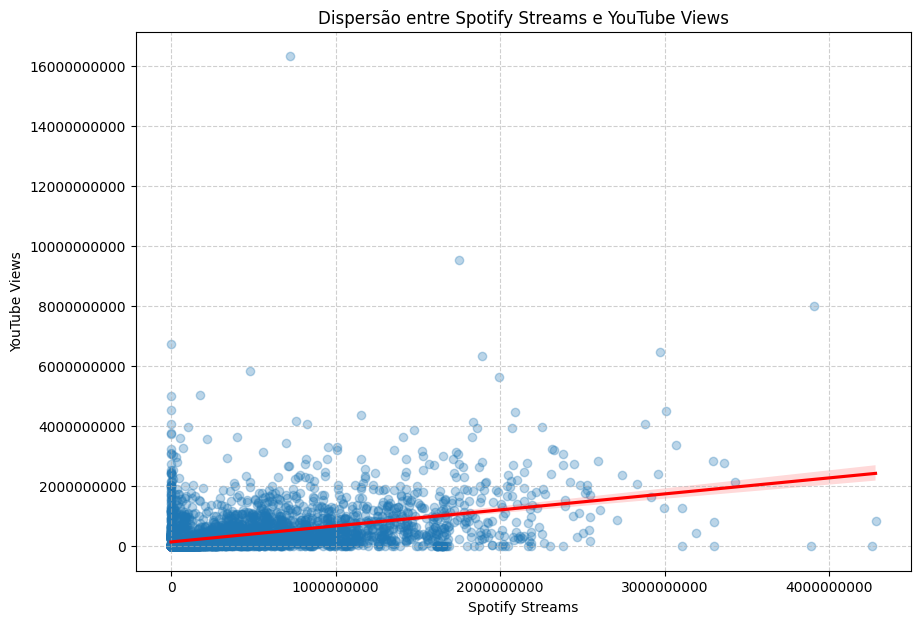

In [41]:
print("Hipótese: Existe uma correlação positiva significativa entre o número de execuções no Spotify (Spotify Streams) e o número de visualizações no YouTube (YouTube Views).\n")

# 1. Análise Estatística: Coeficiente de Correlação de Pearson
print("Análise de Correlação:")
correlation, p_value = stats.pearsonr(df['Spotify Streams'], df['YouTube Views'])

print(f"Coeficiente de Correlação de Pearson: {correlation:.4f}")
print(f"P-valor: {p_value:.4f}")

if p_value < 0.05:
    print("\nRejeitamos H0: Existe uma correlação positiva significativa entre Spotify Streams e YouTube Views.")
else:
    print("\nNão rejeitamos H0: Não há correlação positiva significativa entre Spotify Streams e YouTube Views.")

# 2. Visualização: Gráfico de Dispersão (Scatterplot)
plt.figure(figsize=(10, 7))
sns.regplot(x='Spotify Streams', y='YouTube Views', data=df, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Dispersão entre Spotify Streams e YouTube Views')
plt.xlabel('Spotify Streams')
plt.ylabel('YouTube Views')
plt.ticklabel_format(style='plain', axis='x') # Formata para evitar notação científica no eixo x
plt.ticklabel_format(style='plain', axis='y') # Formata para evitar notação científica no eixo y
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# 3.2 Existe uma correlação positiva significativa entre Spotify Streams e TikTok Posts.

- Apresente análise estatística completa
- Inclua visualizações adequadas
- Realize teste de significância quando aplicável


Hipótese: Existe uma correlação positiva significativa entre Spotify Streams e TikTok Posts.

Análise de Correlação:
Coeficiente de Correlação de Pearson: 0.0612
P-valor: 0.0000

Rejeitamos H0: Existe uma correlação positiva significativa entre Spotify Streams e TikTok Posts.


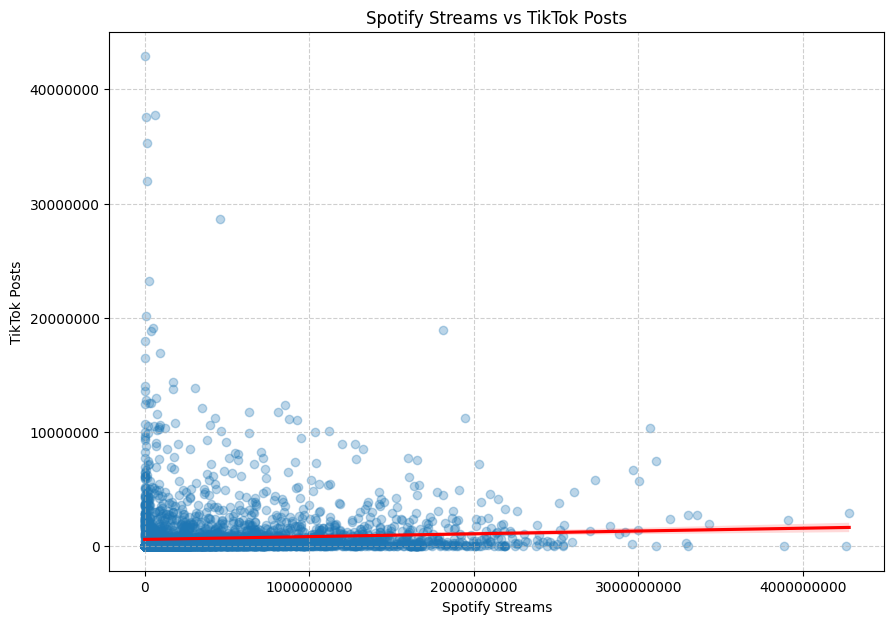

In [42]:
print("Hipótese: Existe uma correlação positiva significativa entre Spotify Streams e TikTok Posts.\n")

# Análise Estatística
print("Análise de Correlação:")
correlation, p_value = stats.pearsonr(df['Spotify Streams'], df['TikTok Posts'])

print(f"Coeficiente de Correlação de Pearson: {correlation:.4f}")
print(f"P-valor: {p_value:.4f}")

if p_value < 0.05:
    print("\nRejeitamos H0: Existe uma correlação positiva significativa entre Spotify Streams e TikTok Posts.")
else:
    print("\nNão rejeitamos H0: Não há correlação significativa entre Spotify Streams e TikTok Posts.")

# Visualização
plt.figure(figsize=(10, 7))
sns.regplot(x='Spotify Streams', y='TikTok Posts', data=df, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Spotify Streams vs TikTok Posts')
plt.xlabel('Spotify Streams')
plt.ylabel('TikTok Posts')
plt.ticklabel_format(style='plain', axis='both')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


# 3.3 Existe uma correlação positiva significativa entre Spotify Popularity e Shazam Counts.
- Apresente análise estatística completa
- Inclua visualizações adequadas
- Realize teste de significância quando aplicável


Hipótese: Existe uma correlação positiva significativa entre Spotify Popularity e Shazam Counts.

Análise de Correlação:
Coeficiente de Correlação de Pearson: 0.1706
P-valor: 0.0000

Rejeitamos H0: Existe uma correlação positiva significativa entre Spotify Popularity e Shazam Counts.


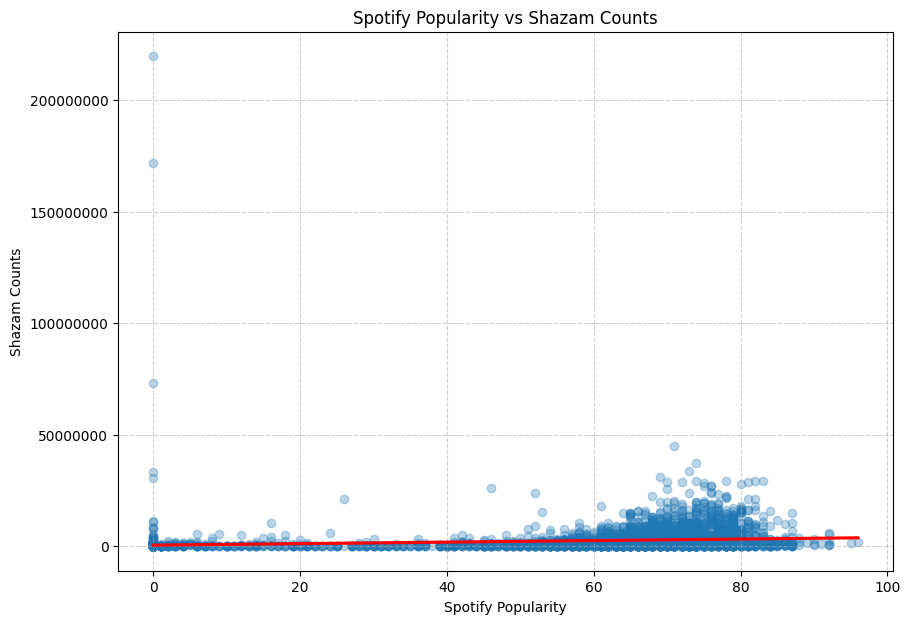

In [43]:
print("Hipótese: Existe uma correlação positiva significativa entre Spotify Popularity e Shazam Counts.\n")

# Análise de Correlação
print("Análise de Correlação:")
correlation, p_value = stats.pearsonr(df['Spotify Popularity'], df['Shazam Counts'])

print(f"Coeficiente de Correlação de Pearson: {correlation:.4f}")
print(f"P-valor: {p_value:.4f}")

if p_value < 0.05:
    print("\nRejeitamos H0: Existe uma correlação positiva significativa entre Spotify Popularity e Shazam Counts.")
else:
    print("\nNão rejeitamos H0: Não há correlação significativa entre Spotify Popularity e Shazam Counts.")

# Visualização
plt.figure(figsize=(10, 7))
sns.regplot(x='Spotify Popularity', y='Shazam Counts', data=df, scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Spotify Popularity vs Shazam Counts')
plt.xlabel('Spotify Popularity')
plt.ylabel('Shazam Counts')
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# **4. Análise Preditia**

- 4.1 Regressão linear simples com uma variável independente
- 4.2 Regressão linear múltipla com pelo menos duas variáveis

-- Compare os modelos usando métricas vistas em aula.
-- Discuta a aplicabilidade dos modelos no contexto empresarial

In [84]:
y = np.log1p(df['Spotify Streams'])

In [85]:
X_simple = df[['Spotify Popularity']]

X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y, test_size=0.3, random_state=42)


In [86]:

all_numeric_features = df.select_dtypes(include=np.number).columns.tolist()

features_for_X_multi = [col for col in all_numeric_features if col != 'Spotify Streams']
X_multi = df[features_for_X_multi]

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y, test_size=0.3, random_state=42)


In [87]:
model_simple = LinearRegression()
model_simple.fit(X_train_s, y_train_s)
y_pred_s = model_simple.predict(X_test_s)
rmse_simple = np.sqrt(mean_squared_error(y_test_s, y_pred_s)) # Usando np.sqrt

In [88]:
model_multi = LinearRegression()
model_multi.fit(X_train_m, y_train_m)
y_pred_m = model_multi.predict(X_test_m)
rmse_multi = np.sqrt(mean_squared_error(y_test_m, y_pred_m))

In [89]:
r2_simple = r2_score(y_test_s, y_pred_s)
r2_multi = r2_score(y_test_m, y_pred_m)

print("--- Resultados dos Modelos de Regressão ---")
print(f"RMSE Regressão Simples (Spotify Popularity → Spotify Streams): {rmse_simple:.2f}")
print(f"R² Regressão Simples: {r2_simple:.4f}") # Maior precisão para o R²
print("-" * 50)
print(f"RMSE Regressão Múltipla (Outras Variáveis Numéricas → Spotify Streams): {rmse_multi:.2f}")
print(f"R² Regressão Múltipla: {r2_multi:.4f}") # Maior precisão para o R²

--- Resultados dos Modelos de Regressão ---
RMSE Regressão Simples (Spotify Popularity → Spotify Streams): 3.19
R² Regressão Simples: 0.2892
--------------------------------------------------
RMSE Regressão Múltipla (Outras Variáveis Numéricas → Spotify Streams): 2.98
R² Regressão Múltipla: 0.3799


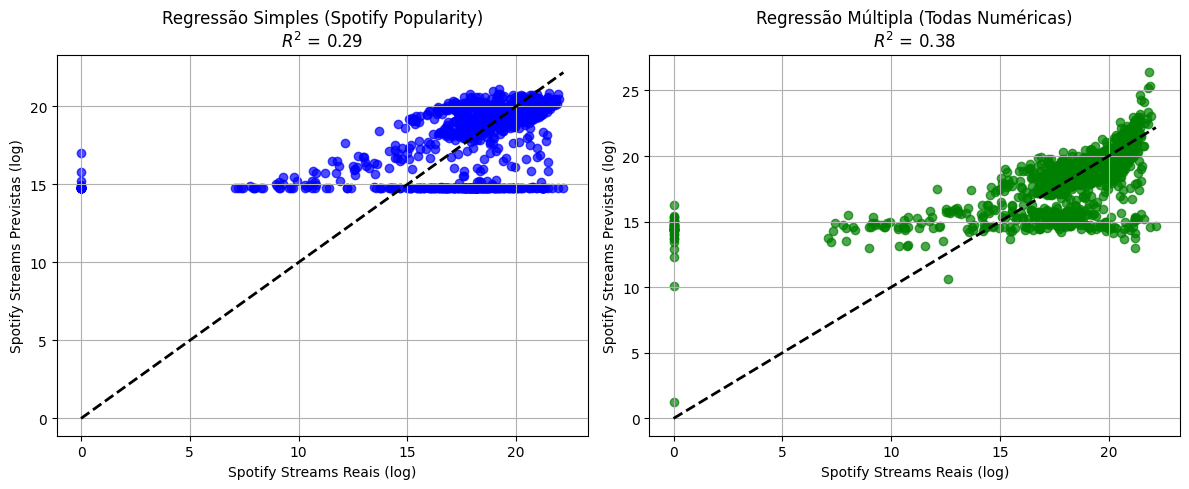

In [90]:
plt.figure(figsize=(12, 5))

# Gráfico: Regressão Simples
plt.subplot(1, 2, 1)
plt.scatter(y_test_s, y_pred_s, alpha=0.7, color='blue')
plt.plot([y_test_s.min(), y_test_s.max()], [y_test_s.min(), y_test_s.max()], 'k--', lw=2)
plt.xlabel('Spotify Streams Reais (log)')
plt.ylabel('Spotify Streams Previstas (log)')
plt.title(f'Regressão Simples (Spotify Popularity)\n$R^2$ = {r2_simple:.2f}')
plt.grid(True)

# Gráfico: Regressão Múltipla
plt.subplot(1, 2, 2)
plt.scatter(y_test_m, y_pred_m, alpha=0.7, color='green')
plt.plot([y_test_m.min(), y_test_m.max()], [y_test_m.min(), y_test_m.max()], 'k--', lw=2)
plt.xlabel('Spotify Streams Reais (log)')
plt.ylabel('Spotify Streams Previstas (log)')
plt.title(f'Regressão Múltipla (Todas Numéricas)\n$R^2$ = {r2_multi:.2f}')
plt.grid(True)

plt.tight_layout()
plt.show()

# **5. Conclusão e Recomendações**

# **Principais Descobertas:**

**Popularidade Extrema:** A maioria das métricas de sucesso (streams, visualizações, likes) mostra que pouquíssimas músicas se tornam grandes hits, enquanto a maioria tem um desempenho modesto. As músicas de sucesso são verdadeiros "outliers".

**Conexão entre Plataformas:** Descobrimos que músicas com mais execuções no Spotify geralmente também têm mais visualizações no YouTube, mostrando uma ligação entre o sucesso em diferentes mídias.

**Influência Variável:** A relação entre Spotify Streams e TikTok Posts é muito fraca, indicando que a quantidade de posts no TikTok por si só não prevê diretamente o volume de streams no Spotify. Já a Spotify Popularity tem uma correlação fraca com Shazam Counts, o que sugere que a popularidade no Spotify não é o principal motor de identificações via Shazam.

**Modelos Preditivos:** Nossos modelos de regressão linear conseguiram explicar parte do sucesso das músicas no Spotify (cerca de 29% com a popularidade do Spotify, e quase 38% com a inclusão de mais variáveis numéricas). Isso significa que, embora consigamos prever algumas tendências, muitos outros fatores influenciam o sucesso de uma música.


# **Impacto para a Organização:**



**Entender o Sucesso:** Gravadoras e artistas podem usar essas análises para entender melhor o que impulsiona a popularidade, como a sinergia entre diferentes plataformas.

**Limitações de Previsão:** Os modelos atuais, apesar de úteis, não são perfeitos para prever o sucesso exato de um hit. Eles podem dar uma estimativa, mas não uma certeza.

**Onde Focar:** A Spotify Popularity se destaca como um bom indicador de streams.


# **Recomendações para o Futuro:**

**Coletar Mais Dados:** Para prever o sucesso com mais precisão, seria bom adicionar dados sobre o gênero da música, o histórico do artista, o investimento em marketing e detalhes sobre a produção.

**Usar Modelos Mais Inteligentes:** Explorar outros tipos de modelos de inteligência artificial (como "Random Forests" ou "Redes Neurais") pode ajudar a capturar relações mais complexas nos dados que a regressão linear não consegue ver.

**Ajustar Estratégias de Marketing:** Com base nas correlações, focar campanhas que incentivem o engajamento cruzado entre plataformas (ex: promoções no YouTube que direcionem para o Spotify). Ajudaria também a entender que nem todas as plataformas (como o TikTok, para este modelo linear) têm um impacto direto e simples em streams.